In [0]:
import numpy as np
import pandas as pd
import seaborn as stats
from sklearn.tree import DecisionTreeClassifier

In [0]:
data=pd.read_csv('https://raw.githubusercontent.com/reddyprasade/Data-Sets-For-Machine-Learnig-and-Data-Science/master/DataSets/drug200.csv')

In [28]:
data.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [0]:
x=data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values

In [0]:
y=data['Drug']

In [0]:
from sklearn import preprocessing
le_sex=preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
x[:,1]=le_sex.transform(x[:,1])

le_BP=preprocessing.LabelEncoder()
le_BP.fit(['LOW','NORMAL','HIGH'])
x[:,2]=le_BP.transform(x[:,2])


le_Chal=preprocessing.LabelEncoder()
le_Chal.fit(['NORMAL','HIGH'])
x[:,3]=le_Chal.transform(x[:,3])



In [32]:
x[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.113999999999999],
       [28, 0, 2, 0, 7.797999999999999],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [33]:
y[0:5]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train,x_test,y_traine,y_test=train_test_split(x,y,test_size=0.3,random_state=3)

In [36]:
x_train.shape

(140, 5)

In [37]:
y_traine.shape

(140,)

In [38]:
drugtree=DecisionTreeClassifier(criterion='entropy',max_depth=4)
drugtree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [40]:
drugtree.fit(x_train,y_traine)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [42]:
predtree=drugtree.predict(x_test)
predtree

array(['drugY', 'drugX', 'drugX', 'drugX', 'drugX', 'drugC', 'drugY',
       'drugA', 'drugB', 'drugA', 'drugY', 'drugA', 'drugY', 'drugY',
       'drugX', 'drugY', 'drugX', 'drugX', 'drugB', 'drugX', 'drugX',
       'drugY', 'drugY', 'drugY', 'drugX', 'drugB', 'drugY', 'drugY',
       'drugA', 'drugX', 'drugB', 'drugC', 'drugC', 'drugX', 'drugX',
       'drugC', 'drugY', 'drugX', 'drugX', 'drugX', 'drugA', 'drugY',
       'drugC', 'drugY', 'drugA', 'drugY', 'drugY', 'drugY', 'drugY',
       'drugY', 'drugB', 'drugX', 'drugY', 'drugX', 'drugY', 'drugY',
       'drugA', 'drugX', 'drugY', 'drugX'], dtype=object)

In [43]:
pd.DataFrame({"actual Data":y_test,"New_predit":predtree})

,actual Data,New_predit
40,drugY,drugY
51,drugX,drugX
139,drugX,drugX
197,drugX,drugX
170,drugX,drugX
82,drugC,drugC
183,drugY,drugY
46,drugA,drugA
70,drugB,drugB
100,drugA,drugA


In [45]:
drugtree.score(x_train,y_traine)

1.0

In [46]:
drugtree.score(x_test,y_test)

0.9833333333333333

In [47]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecissionTree accuracy",metrics.accuracy_score(y_test,predtree))

DecissionTree accuracy 0.9833333333333333


In [0]:
from sklearn.metrics import confusion_matrix,classification_report

In [0]:
data1=confusion_matrix(y_test,predtree)

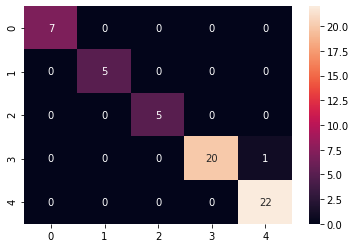

In [50]:
import seaborn as sns
sns.heatmap(data1,annot=True)

In [53]:
print(classification_report(y_test,predtree))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         5
       drugC       1.00      1.00      1.00         5
       drugX       1.00      0.95      0.98        21
       drugY       0.96      1.00      0.98        22

    accuracy                           0.98        60
   macro avg       0.99      0.99      0.99        60
weighted avg       0.98      0.98      0.98        60



In [0]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline
from graphviz import *

In [0]:
dot_data = StringIO()
filename = "drugtree.png"
featureNames = data.columns[0:5]

In [0]:
targetNames = data["Drug"].unique().tolist()
out=tree.export_graphviz(drugtree,feature_names=featureNames, 
                         out_file=dot_data, class_names= np.unique(y_traine),
                         filled=True,  special_characters=True,rotate=False)  

In [65]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')
plt.show()

FileNotFoundError: ignored